<h1 style="text-align: center;">Analisis Peringkat dan Karakteristik Anime<br>Berdasarkan Data MyAnimeList</h1>
<h3 style="text-align: center;">Jawed Iqbal Alfaruqiy</h3>

---

# Latar Belakang
**MyAnimeList** (MAL) merupakan salah satu platform terbesar yang menyediakan informasi tentang anime, termasuk peringkat, skor pengguna, genre, studio, dan popularitas. Dengan memanfaatkan data tersebut, kita dapat menggali karakteristik umum dari anime-anime terbaik saat ini serta mengenali tren yang ada di industri anime.

## Pernyataan Masalah

Perusahaan ingin memahami **karakteristik dari anime-anime dengan peringkat tertinggi**, serta genre dan studio apa yang paling sering muncul dalam daftar tersebut. Informasi ini penting untuk mengetahui tren dan preferensi penonton anime saat ini.

## Key Objective

Untuk menjawab permasalahan tersebut, tujuan utama dari analisis eksplorasi data ini adalah:

1. **Menganalisis distribusi skor dan popularitas** dari anime teratas.
1. **Mengidentifikasi genre dan studio** yang paling sering muncul di daftar ranking teratas.
1. **Mengevaluasi hubungan antara skor, rank, dan popularitas.**
1. **Menganalisis status penayangan dan jumlah episode** dari anime-anime terbaik.

# Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses dari **folder data**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi mengenai anime-anime dengan peringkat tertinggi berdasarkan data dari MyAnimeList, termasuk atribut terkait skor, popularitas, genre, studio, dan informasi pendukung lainnya. **Terdapat 17 kolom** dalam dataset `mal_top_anime_full_2025-04-13.csv`, yaitu:

* **id**: ID unik untuk tiap anime
* **title**: Judul dari anime
* **mean**: Skor rata-rata pengguna
* **rank**: Peringkat anime
* **popularity**: Popularitas berdasarkan jumlah penonton
* **num_list_users**: Jumlah pengguna yang menambahkan ke daftar tontonan
* **num_scoring_users**: Jumlah pengguna yang memberi skor
* **status**: Status penayangan anime (misal: airing, finished, upcoming)
* **start_date**: Tanggal mulai tayang
* **end_date**: Tanggal selesai tayang
* **num_episodes**: Jumlah episode
* **genre_id**: ID genre (angka)
* **genre_name**: Nama genre
* **studio_id**: ID studio (angka)
* **studio_name**: Nama studio yang memproduksi anime
* **ranking_type**: Tipe peringkat (misal: all, airing, upcoming)
* **ranking_date**: Tanggal saat ranking diambil

Berikut 5 baris teratas dan terbawah dari dataset mal_top_anime_full_2025-04-13.

In [40]:
df=pd.read_csv('mal_top_anime.csv')
display(df.head(),df.tail())

,id,title,mean,rank,popularity,num_list_users,num_scoring_users,status,start_date,end_date,num_episodes,genres,studios,ranking_type,ranking_date,start_year,score_bucket,genre
0,52991,Sousou no Frieren,9.3,1.0,152,1090110,638750,finished_airing,2023-09-29,2024-03-22,28,"adventure, drama, fantasy, shounen",madhouse,all,2025-04-16,2023.0,9+,adventure
1,52991,Sousou no Frieren,9.3,1.0,152,1090110,638750,finished_airing,2023-09-29,2024-03-22,28,"adventure, drama, fantasy, shounen",madhouse,all,2025-04-16,2023.0,9+,drama
2,52991,Sousou no Frieren,9.3,1.0,152,1090110,638750,finished_airing,2023-09-29,2024-03-22,28,"adventure, drama, fantasy, shounen",madhouse,all,2025-04-16,2023.0,9+,fantasy
3,52991,Sousou no Frieren,9.3,1.0,152,1090110,638750,finished_airing,2023-09-29,2024-03-22,28,"adventure, drama, fantasy, shounen",madhouse,all,2025-04-16,2023.0,9+,shounen
4,5114,Fullmetal Alchemist: Brotherhood,9.1,2.0,3,3508232,2209390,finished_airing,2009-04-05,2010-07-04,64,"action, adventure, drama, fantasy, military, shounen",bones,all,2025-04-16,2009.0,9+,action


,id,title,mean,rank,popularity,num_list_users,num_scoring_users,status,start_date,end_date,num_episodes,genres,studios,ranking_type,ranking_date,start_year,score_bucket,genre
660,58967,Haikyuu!! Movie: vs. Chiisana Kyojin,NaN,NaN,3797,40396,1,not_yet_aired,NaN,NaN,1,"school, shounen, sports, team sports",production i.g,upcoming,2025-04-16,NaN,NaN,school
661,58967,Haikyuu!! Movie: vs. Chiisana Kyojin,NaN,NaN,3797,40396,1,not_yet_aired,NaN,NaN,1,"school, shounen, sports, team sports",production i.g,upcoming,2025-04-16,NaN,NaN,shounen
662,58967,Haikyuu!! Movie: vs. Chiisana Kyojin,NaN,NaN,3797,40396,1,not_yet_aired,NaN,NaN,1,"school, shounen, sports, team sports",production i.g,upcoming,2025-04-16,NaN,NaN,sports
663,58967,Haikyuu!! Movie: vs. Chiisana Kyojin,NaN,NaN,3797,40396,1,not_yet_aired,NaN,NaN,1,"school, shounen, sports, team sports",production i.g,upcoming,2025-04-16,NaN,NaN,team sports
664,54440,Lycoris Recoil (Shinsaku Animation),NaN,NaN,3844,39210,0,not_yet_aired,NaN,NaN,0,action,NaN,upcoming,2025-04-16,NaN,NaN,action


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset mal_top_anime_wide.

In [41]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (665, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 665 non-null    int64  
 1   title              665 non-null    object 
 2   mean               442 non-null    float64
 3   rank               442 non-null    float64
 4   popularity         665 non-null    int64  
 5   num_list_users     665 non-null    int64  
 6   num_scoring_users  665 non-null    int64  
 7   status             665 non-null    object 
 8   start_date         469 non-null    object 
 9   end_date           272 non-null    object 
 10  num_episodes       665 non-null    int64  
 11  genres             665 non-null    object 
 12  studios            558 non-null    object 
 13  ranking_type       665 non-null    object 
 14  ranking_date       665 non-null    object 
 15  start_year         4

In [42]:
display(df.describe(), df.describe(include='object'))

,id,mean,rank,popularity,num_list_users,num_scoring_users,num_episodes,start_year
count,665.000000,442.000000,442.000000,665.000000,6.650000e+02,6.650000e+02,665.000000,469.000000
mean,45291.655639,8.470543,496.780543,2841.954887,4.299714e+05,2.265817e+05,27.169925,2018.277186
std,19106.669461,0.573925,750.217821,3022.855872,7.103492e+05,4.522446e+05,68.002190,8.870864
min,1.000000,7.350000,1.000000,3.000000,1.076000e+03,0.000000e+00,0.000000,1980.000000
25%,37521.000000,7.835000,20.000000,589.000000,4.417300e+04,3.000000e+00,0.000000,2016.000000
50%,54000.000000,8.770000,41.000000,2284.000000,9.722900e+04,3.234000e+03,2.000000,2022.000000
75%,59189.000000,8.910000,962.500000,3611.000000,4.219630e+05,2.077680e+05,24.000000,2025.000000
max,61322.000000,9.300000,2625.000000,14138.000000,3.508232e+06,2.209390e+06,608.000000,2025.000000


,title,status,start_date,end_date,genres,studios,ranking_type,ranking_date,score_bucket,genre
count,665,665,469,272,665,558,665,665,442,665
unique,149,3,91,52,115,66,3,1,3,57
top,Gintama: The Final,finished_airing,2025-04-05,2021-01-08,"action, comedy, gag humor, historical, parody, samurai, sci-fi, shounen",mappa,all,2025-04-16,8-8.9,action
freq,9,257,24,9,56,61,261,665,254,82


In [43]:
pd.set_option('display.max_colwidth', 1000)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,149,"[52991, 5114, 9253, 38524, 60022, 28977, 39486, 11061, 9969, 15417, 820, 41467, 34096, 43608, 42938, 4181, 918, 28851, 35180, 2904, 15335, 37491, 19, 54492, 51535, 35247, 37987, 59571, 32281, 40682, 58514, 49387, 36838, 263, 31758, 37510, 58567, 40028, 199, 37521, 32935, 48583, 51009, 17074, 47917, 55690, 1, 2921, 52198, 50160, 21, 60988, 53447, 51039, 56524, 55809, 52684, 235, 44042, 59228, 59160, 59636, 51818, 51836, 59953, 47405, 50250, 60557, 56215, 60083, 966, 60420, 60334, 8687, 56038, 58812, 60449, 59189, 49778, 59828, 57442, 51289, 59466, 59597, 59360, 41409, 60593, 58492, 50694, 60407, 54437, 56717, 52709, 53876, 56885, 60658, 58725, 36686, 59452, 52807, ...]"
1,title,149,"[Sousou no Frieren, Fullmetal Alchemist: Brotherhood, Steins;Gate, Shingeki no Kyojin Season 3 Part 2, One Piece Fan Letter, Gintama°, Gintama: The Final, Hunter x Hunter (2011), Gintama', Gintama': Enchousen, Ginga Eiyuu Densetsu, Bleach: Sennen Kessen-hen, Gintama., Kaguya-sama wa Kokurasetai: Ultra Romantic, Fruits Basket: The Final, Clannad: After Story, Gintama, Koe no Katachi, 3-gatsu no Lion 2nd Season, Code Geass: Hangyaku no Lelouch R2, Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare, Gintama. Shirogane no Tamashii-hen - Kouhan-sen, Monster, Kusuriya no Hitorigoto, Shingeki no Kyojin: The Final Season - Kanketsu-hen, Owarimonogatari 2nd Season, Violet Evergarden Movie, Shingeki no Kyojin Movie: Kanketsu-hen - The Last Attack, Kimi no Na wa., Kingdom 3rd Season, Kusuriya no Hitorigoto 2nd Season, Vinland Saga Season 2, Gintama. Shirogane no Tamashii-hen, Hajime no Ippo, Kizumonogatari III: Reiketsu-hen, Mob Psycho 100 II, Ore dake Level Up na Ken Season 2: Arise from ..."
2,mean,68,"[9.3, 9.1, 9.07, 9.05, 9.04, 9.03, 9.02, 9.01, 9.0, 8.98, 8.95, 8.93, 8.91, 8.9, 8.88, 8.87, 8.86, 8.85, 8.83, 8.82, 8.81, 8.78, 8.77, 8.76, 8.75, 8.74, 8.73, 8.52, 8.51, 8.46, 8.38, 8.35, 8.23, 8.17, 8.16, 8.15, 8.14, 8.11, 8.07, 7.93, 7.87, 7.85, 7.83, 7.82, 7.81, 7.78, 7.75, 7.72, 7.71, 7.67, 7.66, 7.65, 7.64, 7.62, 7.59, 7.58, 7.57, 7.54, 7.53, 7.52, 7.44, 7.43, 7.42, 7.41, 7.4, 7.38, 7.36, 7.35, nan]"
3,rank,99,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 133.0, 142.0, 164.0, 208.0, 237.0, 359.0, 438.0, 455.0, 459.0, 471.0, 506.0, 519.0, 565.0, 767.0, 894.0, 937.0, 971.0, 996.0, 1015.0, 1030.0, 1104.0, 1173.0, 1259.0, 1281.0, 1374.0, 1448.0, 1435.0, 1449.0, 1477.0, 1525.0, 1641.0, 1659.0, 1682.0, 1708.0, 1824.0, 1880.0, 1901.0, 2215.0, 2232.0, 2241.0, 2288.0, 2325.0, 2375.0, 2410.0, 2518.0, 2568.0, 2605.0, 2625.0, nan]"
4,popularity,149,"[152, 3, 14, 21, 2174, 344, 1528, 8, 400, 752, 754, 369, 782, 167, 458, 120, 145, 20, 589, 47, 1035, 1223, 123, 386, 284, 591, 338, 3757, 11, 1998, 976, 292, 1164, 359, 494, 73, 441, 31, 44, 70, 116, 98, 135, 317, 324, 1025, 42, 3040, 803, 2635, 17, 8418, 2926, 6812, 9488, 8124, 8269, 701, 3112, 3976, 2049, 5577, 1340, 8658, 6113, 6318, 7689, 13692, 11124, 2820, 2397, 14138, 4772, 5021, 1781, 4932, 4428, 3576, 3012, 4490, 12809, 10869, 3227, 2657, 4300, 8195, 2572, 5586, 4208, 9291, 10978, 12470, 2761, 3947, 5257, 6294, 5395, 7121, 2816, 930, ...]"
5,num_list_users,149,"[1090110, 3508232, 2687350, 2431852, 104341, 663557, 167882, 3007485, 586831, 342880, 342326, 629332, 332891, 1022705, 523348, 1239580, 1111896, 2467291, 421963, 1865088, 252523, 213681, 1223522, 607276, 759969, 420069, 670355, 41253, 2884903, 118495, 268427, 735459, 226598, 645340, 489517, 1632000, 538000, 2143315, 1942560, 1665246, 1269095, 1427458, 1174474, 696266, 686342, 257454, 1961186, 60021, 324169, 77293, 2516181, 5968, 64885, 10113, 4285, 6489, 6195, 363876, 57572, 36477, 114632, 16617, 192868, 5588, 13027, 12021, 7403, 1211, 2602, 69116, 89

Secara umum, kita bisa melihat bahwa:
* dataset mal_top_anime_wide_2025-04-13.csv memiliki 1000 baris dan 14 kolom
* ada nilai `NaN` di beberapa kolom

In [44]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

id                    0.000000
title                 0.000000
mean                 33.533835
rank                 33.533835
popularity            0.000000
num_list_users        0.000000
num_scoring_users     0.000000
status                0.000000
start_date           29.473684
end_date             59.097744
num_episodes          0.000000
genres                0.000000
studios              16.090226
ranking_type          0.000000
ranking_date          0.000000
start_year           29.473684
score_bucket         33.533835
genre                 0.000000
dtype: float64

<Axes: >

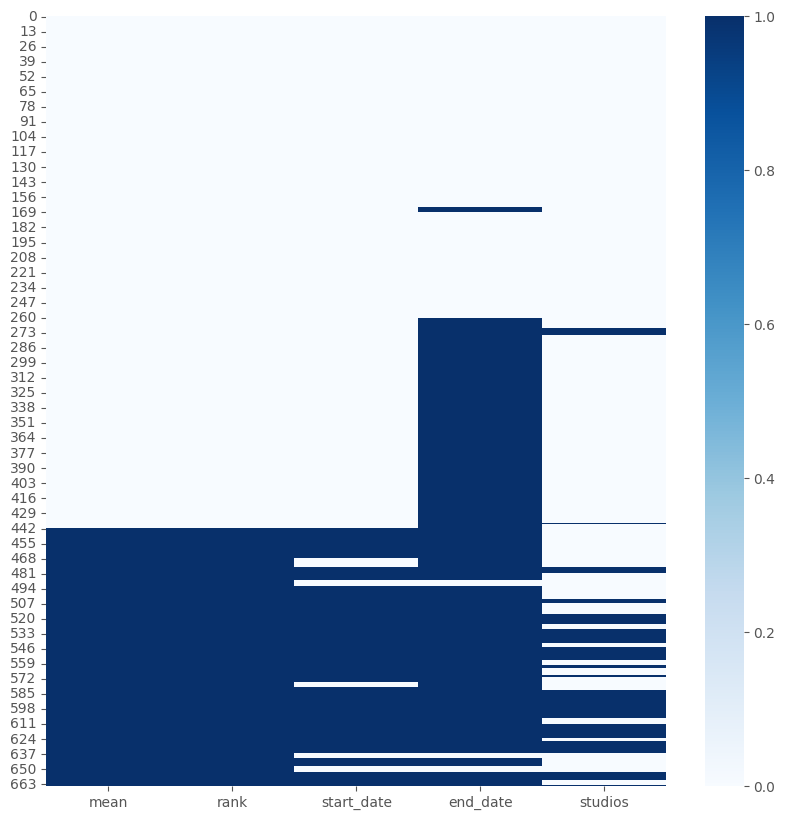

In [45]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['mean', 'rank', 'start_date', 'end_date', 'studios']].isna(), cmap='Blues')

CARA MENANGANI *MISSING VALUE*

In [46]:
# Buat kolom flag missing value (True/False)
df['missing_mean'] = df['mean'].isna()
df['missing_rank'] = df['rank'].isna()
df['missing_start_date'] = df['start_date'].isna()
df['missing_end_date'] = df['end_date'].isna()
df['missing_studios'] = df['studios'].isna()

# Hitung proporsi missing value untuk tiap status
status_check = df.groupby('status')[[
    'missing_mean',
    'missing_rank',
    'missing_start_date',
    'missing_end_date',
    'missing_studios'
]].mean() * 100  # Ubah ke persen

status_check

,missing_mean,missing_rank,missing_start_date,missing_end_date,missing_studios
status,,,,,
currently_airing,0.0,0.0,0.000000,100.000000,3.783784
finished_airing,0.0,0.0,0.000000,0.000000,0.000000
not_yet_aired,100.0,100.0,87.892377,93.273543,44.843049


* Semua *missing value* pada `rank` hanya terjadi pada anime yang berstatus `not_yet_aired`.
* Kolom `end_date` kosong sepenuhnya pada anime dengan status `currently_airing` dan mayoritas `not_yet_aired` (wajar karena belum dimulai).
* Kolom `studios` juga paling sering hilang pada anime yang belum tayang (40%) — bisa jadi karena belum diumumkan.
* Anime yang sudah tayang (`finished_airing`) punya data lengkap, tidak ada *missing value*.

In [47]:
# 1. Drop baris dengan status 'not_yet_aired'
df = df[df['status'] != 'not_yet_aired'].copy()

In [48]:
# 2. Set kolom 'end_date' dan 'studios' menjadi NaN jika status 'currently_airing'
df.loc[df['status'] == 'currently_airing', ['end_date', 'studios']] = 0

In [49]:
df.isna().sum()/df.shape[0]*100

id                    0.0
title                 0.0
mean                  0.0
rank                  0.0
popularity            0.0
num_list_users        0.0
num_scoring_users     0.0
status                0.0
start_date            0.0
end_date              0.0
num_episodes          0.0
genres                0.0
studios               0.0
ranking_type          0.0
ranking_date          0.0
start_year            0.0
score_bucket          0.0
genre                 0.0
missing_mean          0.0
missing_rank          0.0
missing_start_date    0.0
missing_end_date      0.0
missing_studios       0.0
dtype: float64

In [50]:
# Buat kolom flag missing value (True/False)
df['missing_mean'] = df['mean'].isna()
df['missing_rank'] = df['rank'].isna()
df['missing_start_date'] = df['start_date'].isna()
df['missing_end_date'] = df['end_date'].isna()
df['missing_studios'] = df['studios'].isna()

# Hitung proporsi missing value untuk tiap status
status_check = df.groupby('status')[[
    'missing_mean',
    'missing_rank',
    'missing_start_date',
    'missing_end_date',
    'missing_studios'
]].mean() * 100  # Ubah ke persen

status_check

,missing_mean,missing_rank,missing_start_date,missing_end_date,missing_studios
status,,,,,
currently_airing,0.0,0.0,0.0,0.0,0.0
finished_airing,0.0,0.0,0.0,0.0,0.0


In [51]:
# Save new data
df.to_csv('cleaned_mal_top_anime.csv', index=False)

In [52]:
df = pd.read_csv('cleaned_mal_top_anime.csv')
display(df.describe().round(3), df.describe(include='object'))

,id,mean,rank,popularity,num_list_users,num_scoring_users,num_episodes,start_year
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,39157.747,8.471,496.781,2878.102,604700.238,340873.154,40.776,2017.867
std,20779.625,0.574,750.218,3669.718,816866.284,518560.990,80.057,8.976
min,1.000,7.350,1.000,3.000,1076.000,231.000,0.000,1980.000
25%,28977.000,7.835,20.000,292.000,33547.500,3273.750,1.000,2015.000
50%,47917.000,8.770,41.000,1035.000,252523.000,106096.500,13.000,2022.000
75%,56885.000,8.910,962.500,4150.000,735459.000,410341.000,27.750,2024.000
max,60988.000,9.300,2625.000,14138.000,3508232.000,2209390.000,608.000,2025.000


,title,status,start_date,end_date,genres,studios,ranking_type,ranking_date,score_bucket,genre
count,442,442,442,442,442,442,442,442,442,442
unique,99,2,85,50,73,23,2,1,3,51
top,Gintama: The Final,finished_airing,2025-04-05,0,"action, comedy, gag humor, historical, parody, samurai, sci-fi, shounen",0,all,2025-04-16,8-8.9,action
freq,9,257,24,185,56,185,261,442,254,56


In [53]:
# Count number of scoring users
df['num_scoring_users'].sum()

np.int64(150665934)

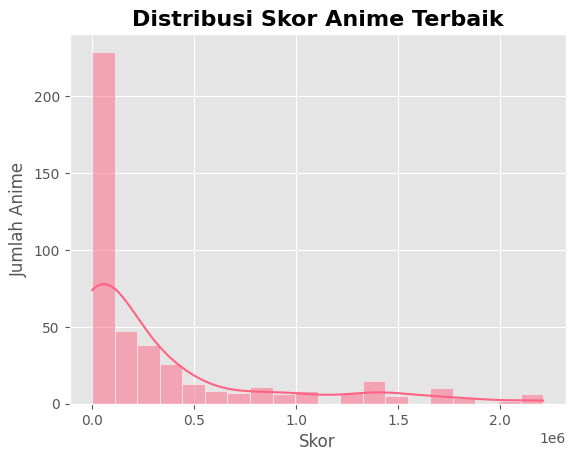

In [54]:
plt.style.use("ggplot")  # bisa diganti ke 'seaborn-poster' juga

# Contoh plot distribusi
sns.histplot(df["num_scoring_users"], bins=20, kde=True, color='#FF6384')
plt.title("Distribusi Skor Anime Terbaik", fontsize=16, fontweight='bold')
plt.xlabel("Skor", fontsize=12)
plt.ylabel("Jumlah Anime", fontsize=12)
plt.grid(True)
plt.show()

## Key Objective 1: Distribusi Skor dan Popularitas

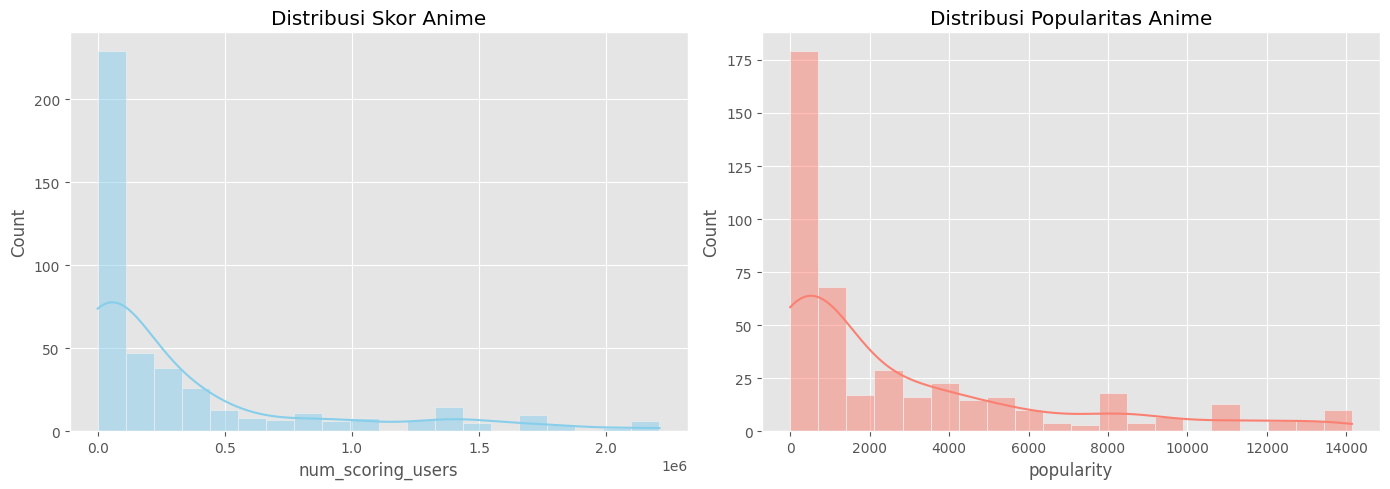

In [55]:
# Objective 1: Distribusi skor dan popularitas
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['num_scoring_users'], bins=20, kde=True, color='skyblue')
plt.title("Distribusi Skor Anime")

plt.subplot(1, 2, 2)
sns.histplot(df['popularity'], bins=20, kde=True, color='salmon')
plt.title("Distribusi Popularitas Anime")
plt.tight_layout()
plt.show()

In [56]:
# Objective 2: Genre & studio yang paling sering muncul
print("Top Genre (frekuensi muncul - hanya 1 genre utama per anime):")
# Pisahkan genre jika ada lebih dari satu
df['genre_main'] = df['genres'].str.split(',').str[0].str.strip()
print(df['genre_main'].value_counts().head(10))

print("\nTop Studios:")
print(df['studios'].value_counts().head(10))

Top Genre (frekuensi muncul - hanya 1 genre utama per anime):
genre_main
action             292
comedy              46
drama               25
adult cast          19
adventure           16
anthropomorphic     10
combat sports        7
award winning        7
cgdct                5
childcare            4
Name: count, dtype: int64

Top Studios:
studios
0                           185
sunrise                      45
bandai namco pictures        41
mappa                        39
shaft                        17
madhouse                     17
a-1 pictures                 14
wit studio                   13
bones                         9
pierrot, studio signpost      8
Name: count, dtype: int64


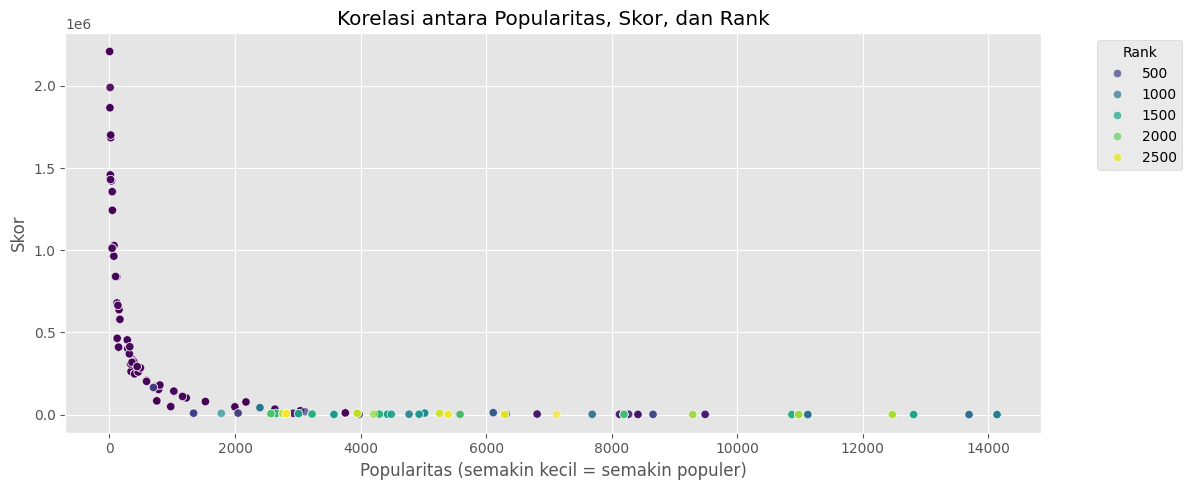


Korelasi antara score, rank, popularity:
                   num_scoring_users      rank  popularity
num_scoring_users           1.000000 -0.408559   -0.483511
rank                       -0.408559  1.000000    0.606797
popularity                 -0.483511  0.606797    1.000000


In [57]:
# Objective 3: Evaluasi hubungan skor, rank, dan popularitas
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='popularity', y='num_scoring_users', hue='rank', palette='viridis', alpha=0.7)
plt.title("Korelasi antara Popularitas, Skor, dan Rank")
plt.xlabel("Popularitas (semakin kecil = semakin populer)")
plt.ylabel("Skor")
plt.legend(title='Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nKorelasi antara score, rank, popularity:")
print(df[['num_scoring_users', 'rank', 'popularity']].corr())

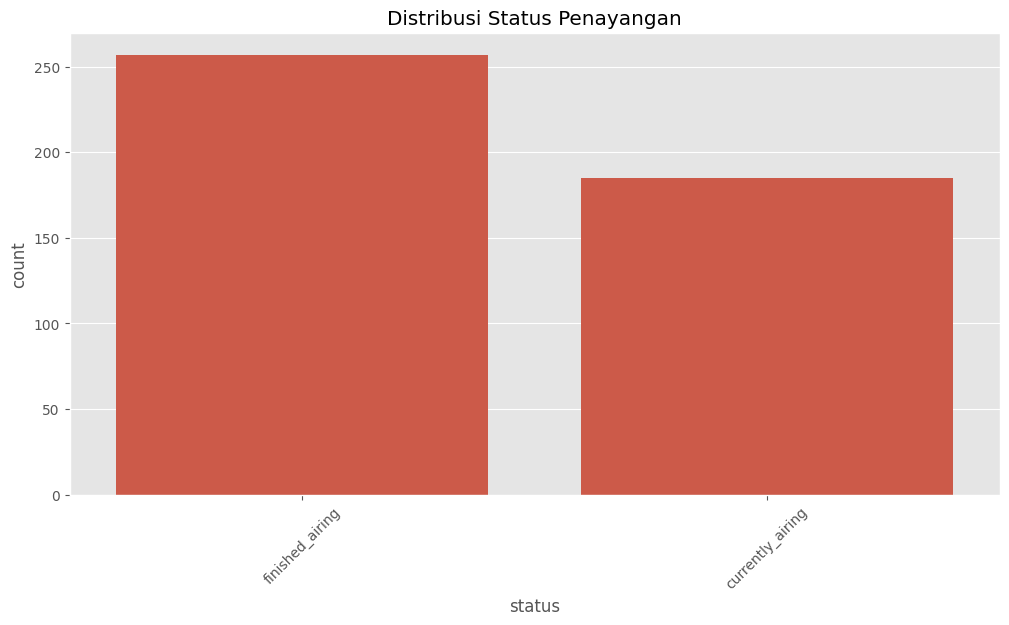

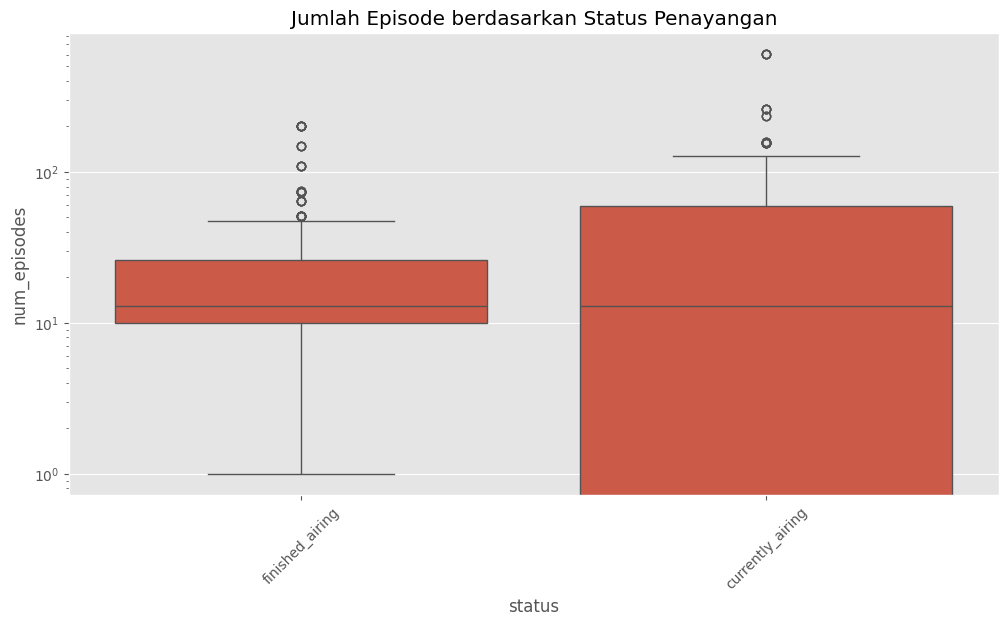

In [58]:
# Objective 4: Status penayangan dan jumlah episode
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index)
plt.title("Distribusi Status Penayangan")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='status', y='num_episodes')
plt.yscale('log')
plt.title("Jumlah Episode berdasarkan Status Penayangan")
plt.xticks(rotation=45)
plt.show()